# **Import Chicago Taxi Public Dataset From BigQuery**

In [1]:
import bq_helper
chicago = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", 
                                       dataset_name = "chicago_taxi_trips")
chicago.list_tables()

Using Kaggle's public dataset BigQuery integration.


['taxi_trips']

In [2]:
chicago.table_schema("taxi_trips")

,name,type,mode,description
0,unique_key,STRING,REQUIRED,Unique identifier for the trip.
1,taxi_id,STRING,REQUIRED,A unique identifier for the taxi.
2,trip_start_timestamp,TIMESTAMP,NULLABLE,"When the trip started, rounded to the nearest ..."
3,trip_end_timestamp,TIMESTAMP,NULLABLE,"When the trip ended, rounded to the nearest 15..."
4,trip_seconds,INTEGER,NULLABLE,Time of the trip in seconds.
5,trip_miles,FLOAT,NULLABLE,Distance of the trip in miles.
6,pickup_census_tract,INTEGER,NULLABLE,The Census Tract where the trip began. For pri...
7,dropoff_census_tract,INTEGER,NULLABLE,The Census Tract where the trip ended. For pri...
8,pickup_community_area,INTEGER,NULLABLE,The Community Area where the trip began.
9,dropoff_community_area,INTEGER,NULLABLE,The Community Area where the trip ended.


In [3]:
chicago.head("taxi_trips")

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,ca2943325bb86524ccb494a82c4361e2e59d94b9,4ab868a2a19b95f50f355eb8d0d7638f1912b37f49ebd6...,2013-04-14 14:45:00+00:00,2013-04-14 15:00:00+00:00,660,0.0,NaN,NaN,14,14,...,0.0,6.85,Cash,Blue Ribbon Taxi Association Inc.,41.968069,-87.721559,POINT (-87.7215590627 41.968069),41.968069,-87.721559,POINT (-87.7215590627 41.968069)
1,65772aeff3599d099f040068b9b7cd4491aea5b6,6682944f2b37609761181033253037c05fed4377e8b649...,2013-05-12 20:15:00+00:00,2013-05-12 20:30:00+00:00,240,0.9,NaN,NaN,41,41,...,1.0,6.05,Cash,Northwest Management LLC,41.794090,-87.592311,POINT (-87.592310855 41.794090253),41.794090,-87.592311,POINT (-87.592310855 41.794090253)
2,be9aee48bd3bc2e919ad76956c94e0bc420366f1,af5b394cb22984f667fc0a9cc30e0277cb9edf50f14747...,2013-04-17 01:45:00+00:00,2013-04-17 02:00:00+00:00,780,0.0,1.703184e+10,1.703124e+10,28,24,...,1.5,12.95,Cash,Dispatch Taxi Affiliation,41.867902,-87.642959,POINT (-87.6429586652 41.8679024175),41.906026,-87.675312,POINT (-87.6753116216 41.906025969)
3,e1a250fcf325056fd51fe87e655f2ee15acd4599,4de82fc17cb23f745931085fbbb3b4f920550cda576979...,2013-04-14 14:30:00+00:00,2013-04-14 14:45:00+00:00,360,1.2,1.703107e+10,1.703183e+10,7,6,...,0.0,6.05,Cash,Dispatch Taxi Affiliation,41.930579,-87.642206,POINT (-87.6422063127 41.9305785697),41.946295,-87.654298,POINT (-87.6542980837 41.9462945357)
4,40c021586099a8bb48795aebbb601384304eb60e,486a31c847d3de20267c610f8de52bdd13c696a8a22bcb...,2013-04-21 02:15:00+00:00,2013-04-21 02:15:00+00:00,360,0.0,1.703107e+10,1.703107e+10,7,7,...,2.0,7.25,Cash,Dispatch Taxi Affiliation,41.929263,-87.635891,POINT (-87.6358909539 41.9292629902),41.921855,-87.646211,POINT (-87.6462109769 41.9218549112)


In [4]:
query = """
SELECT COUNT(*) AS num_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
""" 
df = chicago.query_to_pandas(query)
print(df)

    num_rows
0  214211054


In [5]:
import warnings
warnings.filterwarnings("ignore", message=".*se_inf_as_na option is deprecated.*")
warnings.filterwarnings("ignore", message=".*When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas.*")
warnings.filterwarnings("ignore", message=".*The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.*")

# **Pickup and Drop-Off Times**

     pickup_hour  dropoff_hour  trip_count
0              0             0     5945388
1              0             1     1092619
2              0             2        4974
3              0             3         731
4              0             4         461
..           ...           ...         ...
571           23            19         123
572           23            20         191
573           23            21         118
574           23            22        6966
575           23            23     7205931

[576 rows x 3 columns]


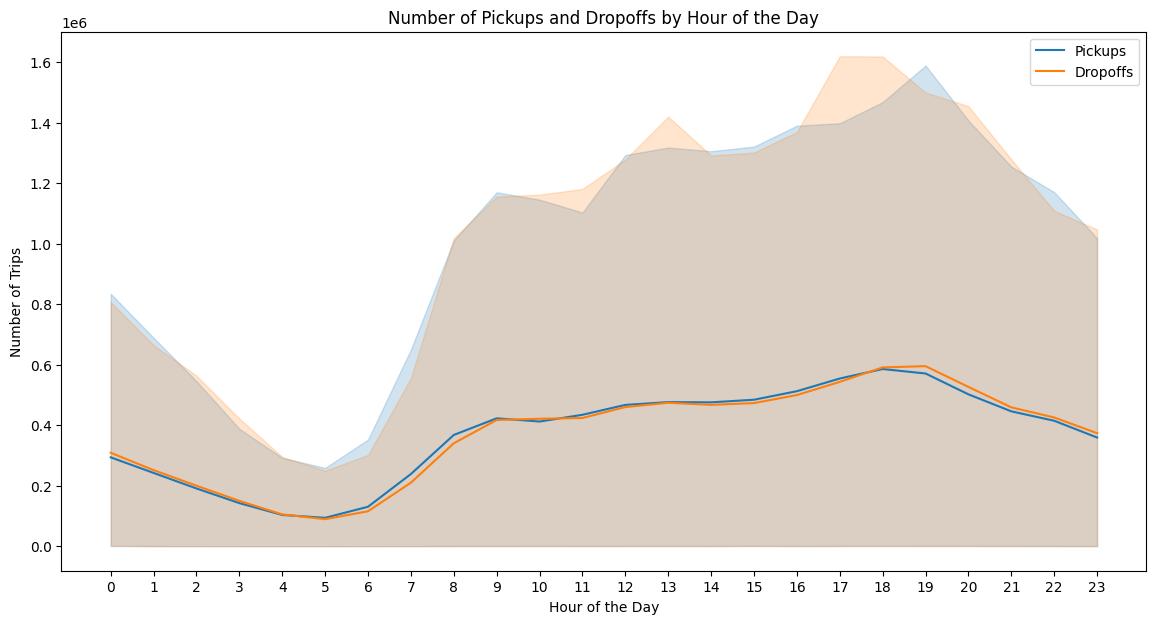

In [6]:
# SQL query to get pickup and drop-off times
query_pickup_dropoff_times = """
SELECT 
  EXTRACT(HOUR FROM trip_start_timestamp) AS pickup_hour,
  EXTRACT(HOUR FROM trip_end_timestamp) AS dropoff_hour,
  COUNT(*) AS trip_count
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE EXTRACT(HOUR FROM trip_start_timestamp) IS NOT NULL
AND EXTRACT(HOUR FROM trip_end_timestamp) IS NOT NULL
GROUP BY pickup_hour, dropoff_hour
ORDER BY pickup_hour, dropoff_hour
"""
pickup_dropoff_times_df = chicago.query_to_pandas(query_pickup_dropoff_times)
print(pickup_dropoff_times_df)

# Visualization of pickup and dropoff times
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=pickup_dropoff_times_df, x='pickup_hour', y='trip_count', label='Pickups')
sns.lineplot(data=pickup_dropoff_times_df, x='dropoff_hour', y='trip_count', label='Dropoffs')
plt.xticks(range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Pickups and Dropoffs by Hour of the Day')
plt.legend()
plt.show()

# **Pickup and Drop-Off Locations**

   pickup_community_area  trip_count   latitude  longitude
0                      8    60375921  41.896078 -87.628167
1                     32    43857027  41.880968 -87.627186
2                     28    18004443  41.879788 -87.649563
3                     76    15313884  41.979492 -87.906737
4                      6    10947495  41.943608 -87.653782
5                      7     8424059  41.921956 -87.645503
6                     24     5479554  41.901347 -87.671903
7                     33     4936136  41.856652 -87.619486
8                     56     3799424  41.788280 -87.757383
9                      3     2939010  41.965240 -87.655824


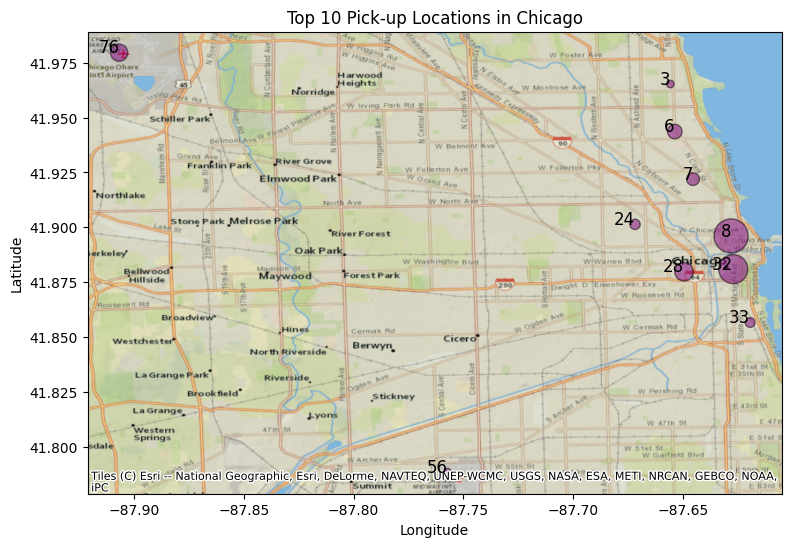

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from google.cloud import bigquery
from shapely.geometry import Point

# Query to get the top 10 pick-up locations
querypu = """
SELECT pickup_community_area, COUNT(taxi_id) as trip_count, 
       AVG(pickup_latitude) as latitude, 
       AVG(pickup_longitude) as longitude
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE pickup_community_area IS NOT NULL
GROUP BY pickup_community_area
ORDER BY trip_count DESC
LIMIT 10;
"""

# Run the query and get the results as a DataFrame
df = chicago.query_to_pandas(querypu)

# Display the results
print(df)

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system to WGS84 (lat/lon)
gdf.crs = 'EPSG:4326'

# Plotting the data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(ax=ax, markersize=gdf['trip_count'] / 100000, color='purple', alpha=0.5, edgecolor='k')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Esri.NatGeoWorldMap)

# Add labels and title
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.pickup_community_area):
    ax.text(x, y, label, fontsize=12, ha='right')

plt.title('Top 10 Pick-up Locations in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

   dropoff_community_area  trip_count   latitude  longitude
0                       8    55145758  41.896114 -87.628077
1                      32    37508383  41.880820 -87.627217
2                      28    19116190  41.879746 -87.650630
3                       6    11894983  41.943416 -87.653513
4                       7    10785746  41.922052 -87.645694
5                      24     7930280  41.900902 -87.671339
6                      76     7771681  41.979394 -87.905230
7                      33     6025915  41.857037 -87.619408
8                       3     3536343  41.965262 -87.655605
9                      22     3058933  41.922328 -87.695459


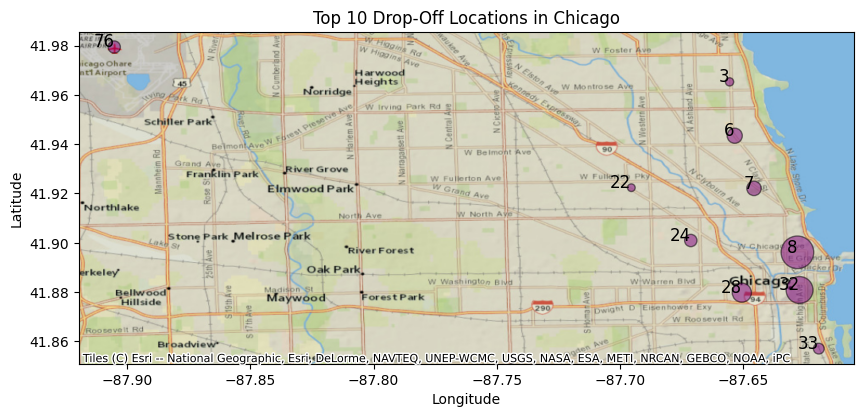

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from google.cloud import bigquery
from shapely.geometry import Point
import seaborn as sns

# Query to get the top 10 pick-up locations
querydo = """
SELECT dropoff_community_area, COUNT(taxi_id) as trip_count, 
       AVG(dropoff_latitude) as latitude, 
       AVG(dropoff_longitude) as longitude
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE dropoff_community_area IS NOT NULL
GROUP BY dropoff_community_area
ORDER BY trip_count DESC
LIMIT 10;
"""

# Run the query and get the results as a DataFrame
df = chicago.query_to_pandas(querydo)

# Display the results
print(df)

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system to WGS84 (lat/lon)
gdf.crs = 'EPSG:4326'

# Plotting the data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(ax=ax, markersize=gdf['trip_count'] / 100000, color='purple', alpha=0.5, edgecolor='k')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Esri.NatGeoWorldMap)

# Add labels and title
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.dropoff_community_area):
    ax.text(x, y, label, fontsize=12, ha='right')

plt.title('Top 10 Drop-Off Locations in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

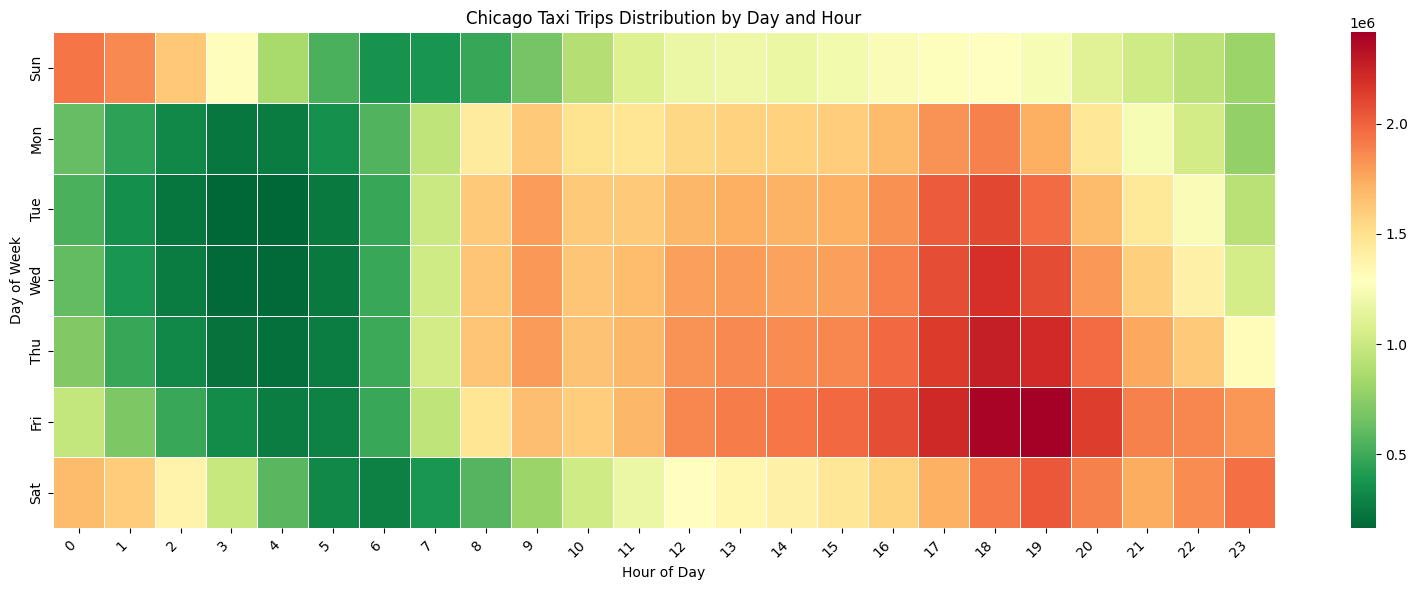

In [9]:
# Query to get the trip count by day of the week and hour of the day
querywh = """
SELECT
  EXTRACT(DAYOFWEEK FROM trip_start_timestamp) AS trip_day,
  EXTRACT(HOUR FROM trip_start_timestamp) AS trip_hour,
  COUNT(*) AS num_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY EXTRACT(DAYOFWEEK FROM trip_start_timestamp), EXTRACT(HOUR FROM trip_start_timestamp)
ORDER BY trip_day, trip_hour;
"""

# Run the query and get the results as a DataFrame
df = chicago.query_to_pandas(querywh)

# Map numeric days to day names
day_mapping = {1: 'Sun', 2: 'Mon', 3: 'Tue', 4: 'Wed', 5: 'Thu', 6: 'Fri', 7: 'Sat'}
df['trip_day'] = df['trip_day'].map(day_mapping)

# Ensure all hours from 0 to 23 are included in the heatmap
all_hours = pd.DataFrame({'trip_hour': range(24)})
df = df.merge(all_hours, on='trip_hour', how='right').fillna(0)

# Convert num_trips to integer to avoid float display issues
df['num_trips'] = df['num_trips'].astype(int)

# Pivot table to reshape data for heatmap
heatmap_data = pd.pivot_table(df, values='num_trips', index='trip_day', columns='trip_hour')

# Reorder days to start from Sunday
heatmap_data = heatmap_data.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Create a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap='RdYlGn_r', linewidths=.5)

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Chicago Taxi Trips Distribution by Day and Hour')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **First Companies and Wait Times**

['Choice Taxi Association', 'Taxi Affiliation Services', 'Northwest Management LLC', 'Blue Ribbon Taxi Association Inc.', 'Dispatch Taxi Affiliation', '6743 - Luhak Corp', '5437 - Great American Cab Co', '2767 - Sayed M Badri', 'Chicago Elite Cab Corp.', 'Yellow Cab', 'Park Ridge Taxi and Livery', '4787 - Reny Cab Co', 'American United Cab Association', '4615 - Tyrone Henderson', '1085 - N and W Cab Co']


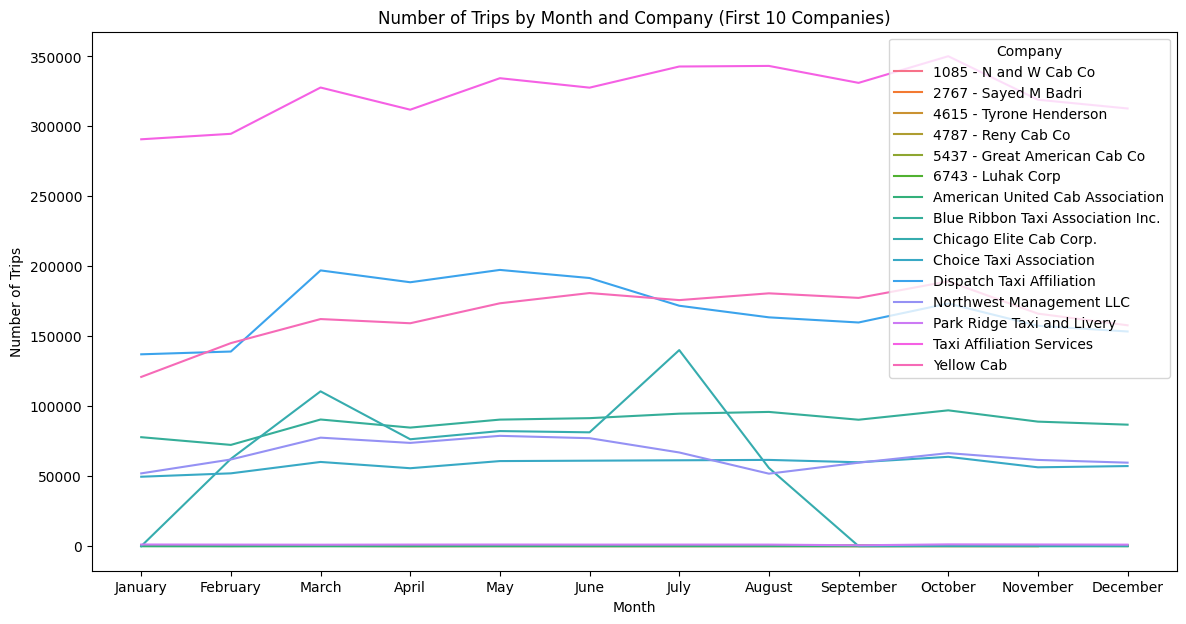

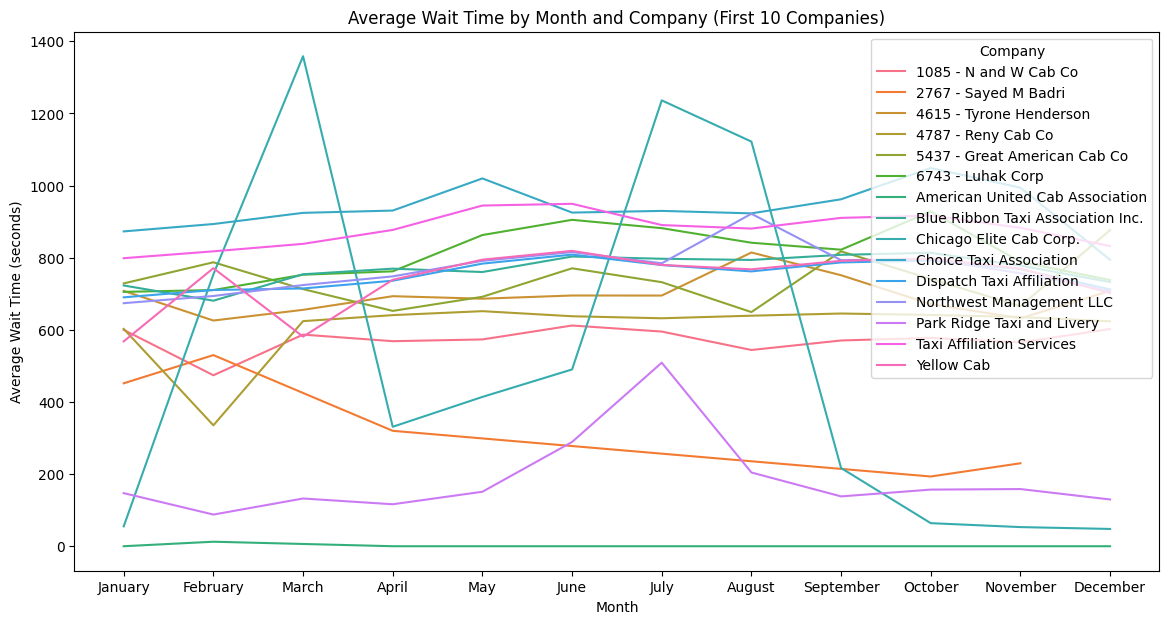

In [10]:
# SQL query to identify the first 10 companies to enter the market based on the earliest recorded trips
query_first_companies = """
SELECT 
    company,
    MIN(trip_start_timestamp) AS first_trip
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company IS NOT NULL
GROUP BY company
ORDER BY first_trip
LIMIT 15
"""

first_companies_df = chicago.query_to_pandas(query_first_companies)
first_companies = first_companies_df['company'].tolist()
print(first_companies)

# SQL query for ride availability and wait times limited to the first 10 companies
querywt = f"""
WITH ride_times AS (
  SELECT
    company,
    EXTRACT(YEAR FROM trip_start_timestamp) AS year,
    EXTRACT(MONTH FROM trip_start_timestamp) AS month,
    COUNT(*) AS trip_count,
    AVG(trip_seconds) AS avg_wait_time
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE company IN ({','.join([f"'{company}'" for company in first_companies])})
  GROUP BY company, year, month
)
SELECT
  company,
  year,
  month,
  trip_count,
  avg_wait_time
FROM ride_times
ORDER BY company, year, month
"""

df = chicago.query_to_pandas(querywt)

# Define month names for the x-axis
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Visualization of trip counts by month and company
offset = 0.05
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='month', y='trip_count', hue='company', errorbar=None)

# Set month labels with names
plt.xticks(range(1, 13), [month_names[m] for m in range(1, 13)])  # Use month_names dictionary

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Month and Company (First 10 Companies)')
plt.legend(title='Company')
plt.show()

# Visualization of average wait times by month and company
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='month', y='avg_wait_time', hue='company', errorbar=None)

# Set month labels with names
plt.xticks(range(1, 13), [month_names[m] for m in range(1, 13)])  # Use month_names dictionary

plt.xlabel('Month')
plt.ylabel('Average Wait Time (seconds)')
plt.title('Average Wait Time by Month and Company (First 10 Companies)')
plt.legend(title='Company')
plt.show()